In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\chandrakiran\Downloads\data_2_var.csv")

In [3]:
df

,-122.7406674,-130.5720846
0,-121.531419,-129.938929
1,-134.917019,-130.141832
2,-120.605951,-125.760932
3,-129.894781,-112.785214
4,-134.366669,-116.000000
...,...,...
1105,-115.366669,121.000000
1106,-119.954237,123.609122
1107,-109.942155,127.197394
1108,-111.515368,128.170885


In [4]:
df = df.rename(columns={"-122.7406674": "f1", "-130.5720846": "y"})
df

,f1,y
0,-121.531419,-129.938929
1,-134.917019,-130.141832
2,-120.605951,-125.760932
3,-129.894781,-112.785214
4,-134.366669,-116.000000
...,...,...
1105,-115.366669,121.000000
1106,-119.954237,123.609122
1107,-109.942155,127.197394
1108,-111.515368,128.170885


In [5]:
df.describe()

,f1,y
count,1110.000000,1110.000000
mean,6.899714,-26.093318
std,79.324069,69.755980
min,-134.962839,-132.422167
25%,-53.366669,-76.994298
50%,15.739103,-46.036319
75%,76.193907,7.598960
max,134.605775,134.425495


In [6]:
df.shape

(1110, 2)

<AxesSubplot:xlabel='f1', ylabel='y'>

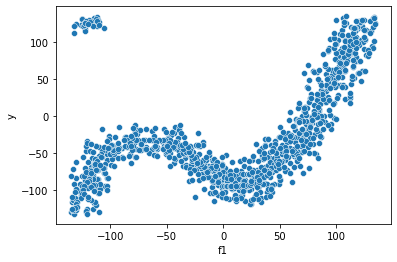

In [7]:
sns.scatterplot(data=df, x='f1', y='y')

## REMOVAL OF OUTLIERS

<AxesSubplot:xlabel='f1'>

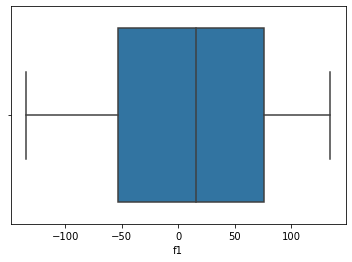

In [8]:
sns.boxplot(data=df, x='f1')

<AxesSubplot:xlabel='y'>

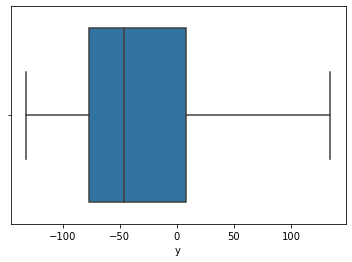

In [9]:
sns.boxplot(data=df, x='y')

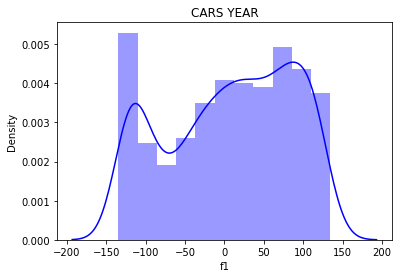

In [11]:
sns.distplot(df.f1,kde=True,color='blue')
plt.title('CARS YEAR')
plt.show()

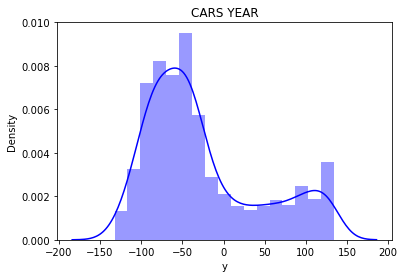

In [13]:
sns.distplot(df.y,kde=True,color='blue')
plt.title('CARS YEAR')
plt.show()

In [14]:
outliers = df[(df['f1']<(-100)) & (df['y']>100)].index
outliers

Int64Index([1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081,
            1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092,
            1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103,
            1104, 1105, 1106, 1107, 1108, 1109],
           dtype='int64')

In [22]:
df.drop((df(outliers),inplace=True,axis=0)

SyntaxError: invalid syntax (Temp/ipykernel_37976/3537057022.py, line 1)

<AxesSubplot:xlabel='f1', ylabel='y'>

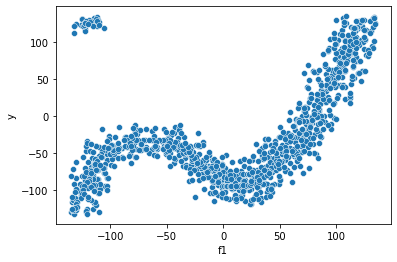

In [18]:
sns.scatterplot(data=df, x='f1', y='y')

## MODEL TRAINING

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(df[['f1']], df['y'])

LinearRegression()

In [24]:
print(reg.coef_, reg.intercept_)

[0.39977254] -28.85163397847335


In [25]:
pred = reg.predict(df[['f1']])

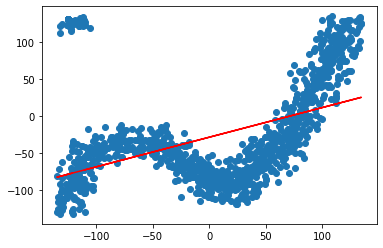

In [26]:
plt.scatter(df['f1'], df['y'])

plt.plot(df['f1'], pred, 'r')

plt.show()


In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=10)
X_poly = poly_features.fit_transform(df[['f1']])
X_poly

array([[ 1.00000000e+00, -1.21531419e+02,  1.47698859e+04, ...,
         4.75892172e+16, -5.78358512e+18,  7.02887309e+20],
       [ 1.00000000e+00, -1.34917019e+02,  1.82026020e+04, ...,
         1.09782697e+17, -1.48115542e+19,  1.99833074e+21],
       [ 1.00000000e+00, -1.20605951e+02,  1.45457954e+04, ...,
         4.47661662e+16, -5.39906605e+18,  6.51159497e+20],
       ...,
       [ 1.00000000e+00, -1.09942155e+02,  1.20872774e+04, ...,
         2.13458748e+16, -2.34681147e+18,  2.58013510e+20],
       [ 1.00000000e+00, -1.11515368e+02,  1.24356774e+04, ...,
         2.39154076e+16, -2.66693549e+18,  2.97404294e+20],
       [ 1.00000000e+00, -1.10344221e+02,  1.21758472e+04, ...,
         2.19784346e+16, -2.42519325e+18,  2.67606061e+20]])

In [34]:
transformed_df = pd.DataFrame(X_poly, columns=['f1_0', 'f1_1', 'f1_2','f1_3','f1_4','f1_5','f1_6','f1_7','f1_8','f1_9','f1_10'])

transformed_df['y'] = df['y']

transformed_df.head()

,f1_0,f1_1,f1_2,f1_3,f1_4,f1_5,f1_6,f1_7,f1_8,f1_9,f1_10,y
0,1.0,-121.531419,14769.885901,-1.795005e+06,2.181495e+08,-2.651202e+10,3.222044e+12,-3.915795e+14,4.758922e+16,-5.783585e+18,7.028873e+20,-129.938929
1,1.0,-134.917019,18202.602016,-2.455841e+06,3.313347e+08,-4.470269e+10,6.031154e+12,-8.137053e+14,1.097827e+17,-1.481155e+19,1.998331e+21,-130.141832
2,1.0,-120.605951,14545.795441,-1.754309e+06,2.115802e+08,-2.551783e+10,3.077602e+12,-3.711771e+14,4.476617e+16,-5.399066e+18,6.511595e+20,-125.760932
3,1.0,-129.894781,16872.654053,-2.191670e+06,2.846865e+08,-3.697928e+10,4.803416e+12,-6.239387e+14,8.104638e+16,-1.052750e+19,1.367467e+21,-112.785214
4,1.0,-134.366669,18054.401658,-2.425910e+06,3.259614e+08,-4.379835e+10,5.885038e+12,-7.907530e+14,1.062508e+17,-1.427657e+19,1.918295e+21,-116.000000


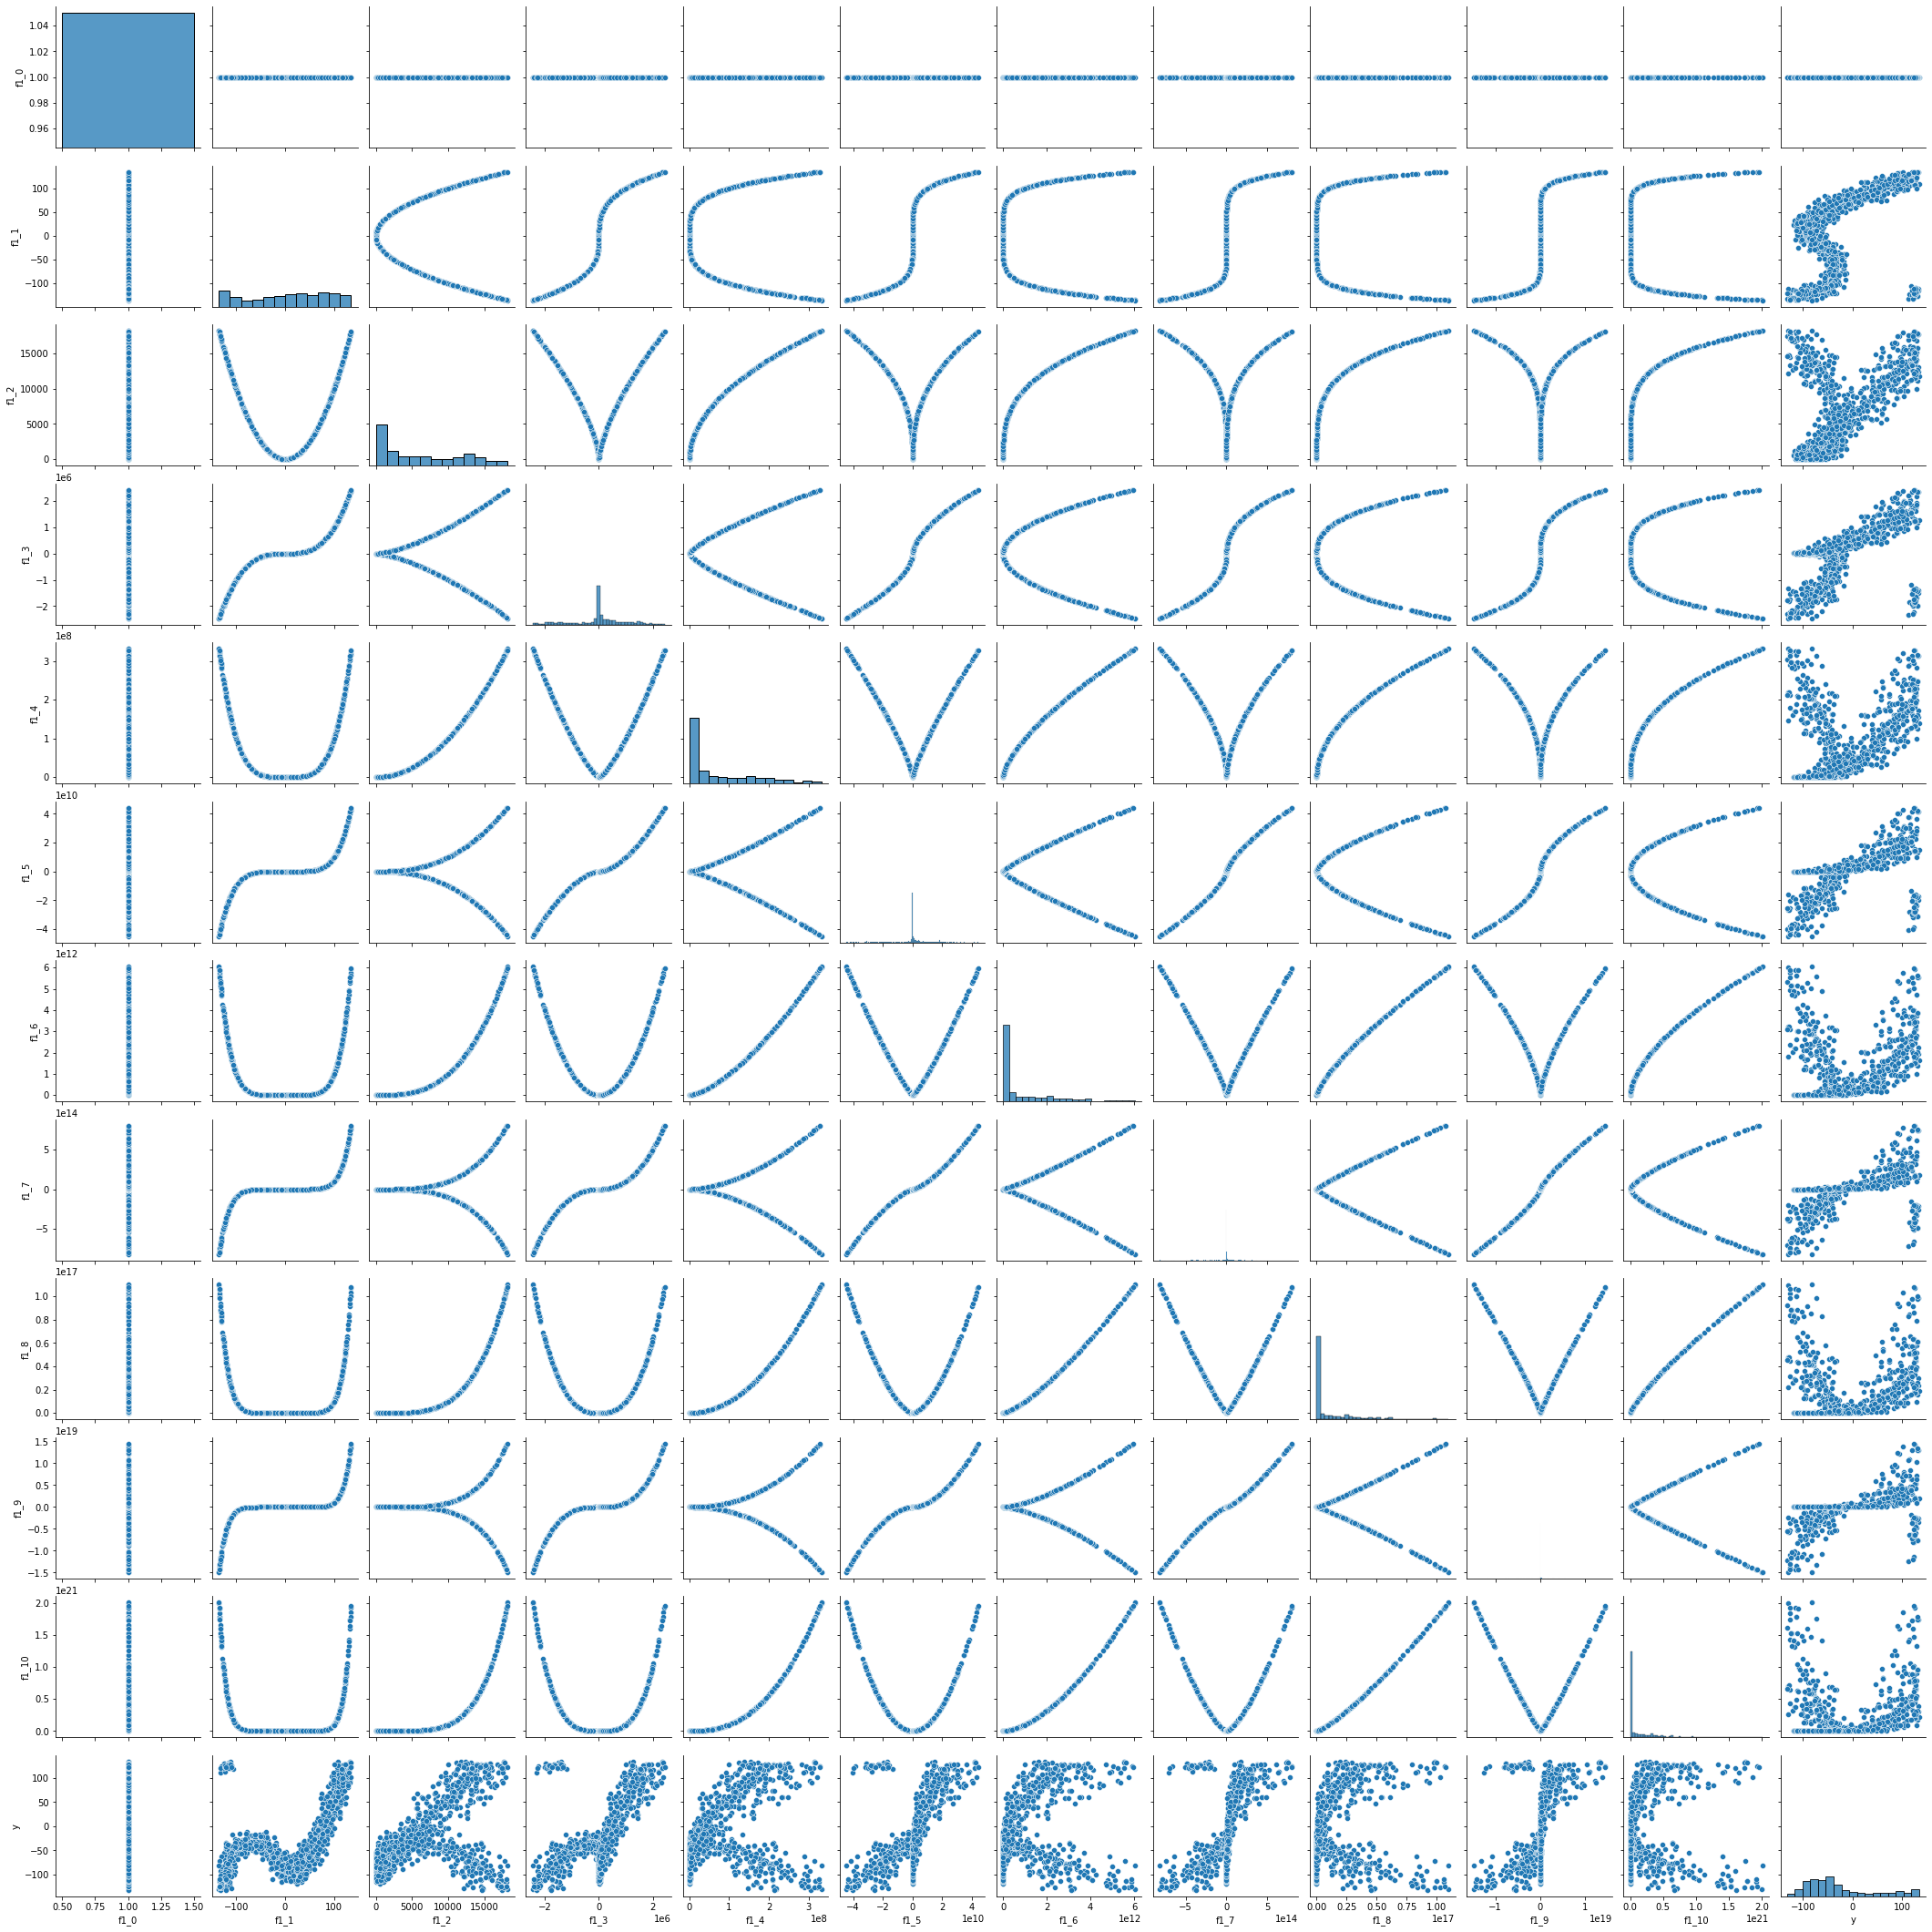

In [35]:
sns.pairplot(transformed_df)

In [36]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(transformed_df[['f1_5']], transformed_df['y'])

LinearRegression()

In [37]:
print(reg.coef_, reg.intercept_)

[2.38105676e-09] -24.407413506763294


In [38]:
pred = reg.predict(transformed_df[['f1_5']])

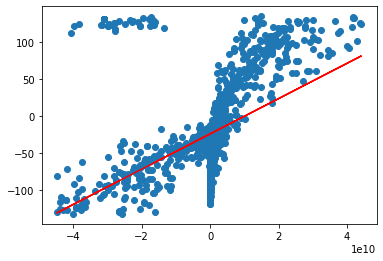

In [39]:
plt.scatter(transformed_df[['f1_5']], transformed_df['y'])

plt.plot(transformed_df[['f1_5']], pred, 'r')

plt.show()
